***Random Forest***
1.It is an extension of decision tree                                                                                            2.based on voting                                                                                                                3.the data set is divided into subparts and the outputs of the subparts are considered for voting and the majority class will be the final output                                                                                                                  4.more no.of trees higher accuracy


***working of random forest:***
**1**.Divides into subparts randomly(bootstraping)
**2**.Decision tree is applied for each subset
**3**.prediction is calculated(aggregating)
***Bootstraping+aggregating=Bagging***

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.datasets import load_digits

In [2]:
dig=load_digits()

In [5]:
dig

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]]),
 'target': array([0, 1, 2, ..., 8, 9, 8]),
 'frame': None,
 'feature_names': ['pixel_0_0',
  'pixel_0_1',
  'pixel_0_2',
  'pixel_0_3',
  'pixel_0_4',
  'pixel_0_5',
  'pixel_0_6',
  'pixel_0_7',
  'pixel_1_0',
  'pixel_1_1',
  'pixel_1_2',
  'pixel_1_3',
  'pixel_1_4',
  'pixel_1_5',
  'pixel_1_6',
  'pixel_1_7',
  'pixel_2_0',
  'pixel_2_1',
  'pixel_2_2',
  'pixel_2_3',
  'pixel_2_4',
  'pixel_2_5',
  'pixel_2_6',
  'pixel_2_7',
  'pixel_3_0',
  'pixel_3_1',
  'pixel_3_2',
  'pixel_3_3',
  'pixel_3_4',
  'pixel_3_5',
  'pixel_3_6',
  'pixel_3_7',
  'pixel_4_0',
  'pixel_4_1',
  'pixel_4_2',
  'pixel_4_3',
  'pixel_4_4',
  'pixel_4_5',
  'pixel_4_6',
  'pixel_4_7',
  'pixel_5_0',
  'pixel_5_1',
 

In [6]:
df=pd.DataFrame(dig.data,columns=dig.feature_names)
df

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,0.0,0.0,4.0,10.0,13.0,6.0,0.0,0.0,0.0,1.0,...,4.0,0.0,0.0,0.0,2.0,14.0,15.0,9.0,0.0,0.0
1793,0.0,0.0,6.0,16.0,13.0,11.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,6.0,16.0,14.0,6.0,0.0,0.0
1794,0.0,0.0,1.0,11.0,15.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,9.0,13.0,6.0,0.0,0.0
1795,0.0,0.0,2.0,10.0,7.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,0.0,5.0,12.0,16.0,12.0,0.0,0.0


In [8]:
df.shape

(1797, 64)

In [9]:
dig.target

array([0, 1, 2, ..., 8, 9, 8])

In [10]:
df['digit']=dig.target

In [11]:
df

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7,digit
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,0.0,0.0,4.0,10.0,13.0,6.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,2.0,14.0,15.0,9.0,0.0,0.0,9
1793,0.0,0.0,6.0,16.0,13.0,11.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,16.0,14.0,6.0,0.0,0.0,0
1794,0.0,0.0,1.0,11.0,15.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,9.0,13.0,6.0,0.0,0.0,8
1795,0.0,0.0,2.0,10.0,7.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,5.0,12.0,16.0,12.0,0.0,0.0,9


In [13]:
df['digit'].value_counts()

3    183
5    182
1    182
6    181
4    181
9    180
7    179
0    178
2    177
8    174
Name: digit, dtype: int64

In [14]:
df.isnull().sum()

pixel_0_0    0
pixel_0_1    0
pixel_0_2    0
pixel_0_3    0
pixel_0_4    0
            ..
pixel_7_4    0
pixel_7_5    0
pixel_7_6    0
pixel_7_7    0
digit        0
Length: 65, dtype: int64

In [15]:
inp=df.drop('digit',axis=1)

In [16]:
out=df['digit']

In [17]:
from sklearn.model_selection import train_test_split

In [42]:
X_train, X_test, y_train, y_test=train_test_split(inp,out,test_size=0.2)

In [43]:
len(X_train)

1437

In [44]:
len(X_test)

360

In [45]:
from sklearn.ensemble import RandomForestClassifier

In [46]:
rf=RandomForestClassifier(n_estimators=100,max_depth=4)

In [47]:
rf.fit(inp,out)

RandomForestClassifier(max_depth=4)

In [48]:
out_p=rf.predict(X_test)
out_p

array([1, 5, 4, 3, 3, 0, 4, 7, 9, 5, 5, 7, 2, 7, 9, 9, 5, 4, 2, 3, 3, 5,
       9, 5, 7, 7, 8, 6, 7, 7, 0, 8, 8, 1, 7, 6, 2, 5, 2, 8, 0, 8, 9, 0,
       8, 2, 2, 2, 3, 1, 1, 7, 3, 2, 6, 7, 8, 1, 4, 8, 7, 9, 3, 6, 1, 7,
       6, 2, 8, 2, 9, 8, 7, 4, 2, 4, 8, 5, 2, 3, 4, 6, 8, 9, 3, 1, 5, 6,
       5, 5, 2, 9, 7, 4, 2, 1, 8, 7, 4, 4, 8, 8, 4, 0, 8, 5, 5, 3, 9, 9,
       0, 0, 1, 6, 8, 3, 2, 2, 2, 0, 0, 0, 1, 5, 2, 2, 9, 6, 4, 7, 3, 1,
       2, 7, 3, 1, 5, 8, 6, 3, 4, 2, 6, 8, 4, 3, 5, 0, 6, 2, 1, 7, 6, 3,
       4, 0, 9, 9, 0, 3, 8, 7, 0, 4, 7, 4, 1, 0, 3, 7, 5, 9, 4, 4, 1, 0,
       9, 2, 9, 9, 0, 0, 8, 8, 1, 0, 1, 4, 4, 4, 4, 9, 2, 6, 2, 1, 2, 4,
       4, 9, 1, 8, 0, 7, 1, 9, 1, 3, 1, 0, 4, 5, 3, 2, 9, 3, 5, 8, 5, 2,
       1, 8, 2, 6, 7, 8, 3, 4, 0, 0, 4, 5, 4, 2, 1, 4, 9, 7, 2, 7, 1, 1,
       6, 5, 6, 3, 9, 6, 7, 0, 6, 8, 6, 5, 7, 3, 8, 0, 0, 2, 1, 6, 5, 3,
       0, 4, 3, 0, 4, 6, 1, 4, 4, 7, 7, 9, 8, 5, 3, 4, 9, 6, 1, 7, 9, 8,
       8, 4, 5, 2, 4, 2, 7, 1, 4, 7, 3, 7, 9, 2, 1,

In [51]:
from sklearn.metrics import confusion_matrix,accuracy_score

In [52]:
confusion_matrix(y_test,out_p)

array([[36,  0,  0,  0,  1,  0,  0,  0,  0,  0],
       [ 0, 32,  0,  0,  0,  0,  0,  0,  0,  2],
       [ 0,  0, 40,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  1,  0, 37,  0,  1,  0,  1,  0,  0],
       [ 0,  0,  0,  0, 42,  0,  0,  1,  0,  0],
       [ 0,  0,  0,  0,  0, 26,  1,  0,  0,  1],
       [ 0,  1,  0,  0,  0,  0, 27,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 35,  0,  0],
       [ 0,  1,  2,  0,  1,  0,  0,  1, 33,  2],
       [ 0,  1,  0,  3,  0,  0,  0,  0,  1, 30]], dtype=int64)

In [53]:
accuracy_score(y_test,out_p)

0.9388888888888889

In [54]:
from sklearn import tree

In [56]:
import matplotlib.pyplot as plt

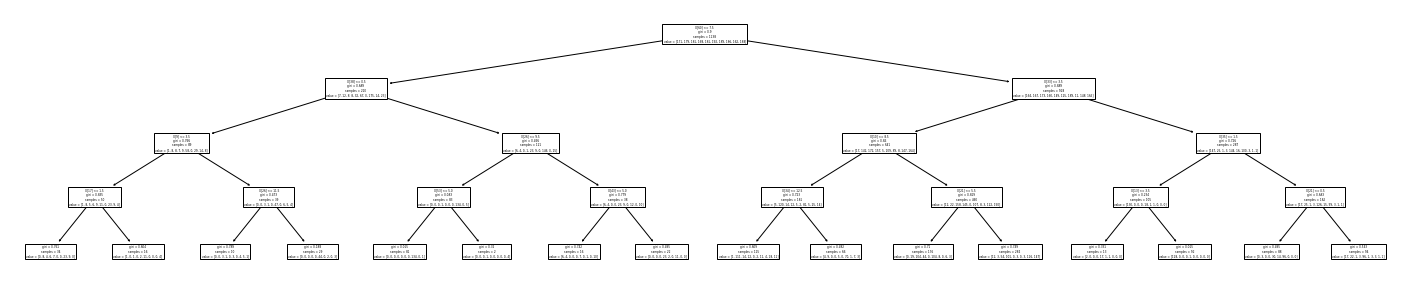

In [58]:
plt.figure(figsize=(25,5))
tree.plot_tree(rf.estimators_[0])
plt.show()